In [1]:
import seedir as sd

DEEPEN_NUSCENES_ROOT = '/data/rosa_nuscenes'

sd.seedir(DEEPEN_NUSCENES_ROOT, style='emoji')

📁 rosa_nuscenes/
├─📁 sweeps/
│ ├─📁 CAM_FRONT/
│ ├─📁 LADYBUG_FRONT_RIGHT/
│ ├─📁 LADYBUG_BACK_RIGHT/
│ ├─📁 LIDAR_TOP/
│ ├─📁 CAMERA_FRONT/
│ ├─📁 LADYBUG_BACK_LEFT/
│ ├─📁 LADYBUG_FRONT_LEFT/
│ └─📁 LADYBUG_FRONT/
├─📁 samples/
│ ├─📁 CAM_FRONT/
│ │ ├─📄 FfB1kV7YsZHvzmAwjINERrCs_298.pcd.jpg
│ │ ├─📄 FfB1kV7YsZHvzmAwjINERrCs_292.pcd.jpg
│ │ ├─📄 6dxeLhuoQr0JgHsLjUU6TmhF_21.pcd.jpg
│ │ ├─📄 FfB1kV7YsZHvzmAwjINERrCs_94.pcd.jpg
│ │ ├─📄 mAt0wn6MkQCbuRwmbVoqbvkz_161.pcd.jpg
│ │ ├─📄 FfB1kV7YsZHvzmAwjINERrCs_4.pcd.jpg
│ │ ├─📄 mAt0wn6MkQCbuRwmbVoqbvkz_0.pcd.jpg
│ │ ├─📄 FfB1kV7YsZHvzmAwjINERrCs_282.pcd.jpg
│ │ ├─📄 FfB1kV7YsZHvzmAwjINERrCs_39.pcd.jpg
│ │ ├─📄 6dxeLhuoQr0JgHsLjUU6TmhF_33.pcd.jpg
│ │ ├─📄 FfB1kV7YsZHvzmAwjINERrCs_329.pcd.jpg
│ │ ├─📄 6dxeLhuoQr0JgHsLjUU6TmhF_121.pcd.jpg
│ │ ├─📄 mAt0wn6MkQCbuRwmbVoqbvkz_165.pcd.jpg
│ │ ├─📄 FfB1kV7YsZHvzmAwjINERrCs_182.pcd.jpg
│ │ ├─📄 mAt0wn6MkQCbuRwmbVoqbvkz_124.pcd.jpg
│ │ ├─📄 6dxeLhuoQr0JgHsLjUU6TmhF_112.pcd.jpg
│ │ ├─📄 FfB1kV7YsZHvzmAwjINERrCs_348.pcd.jpg
│ │ ├

In [2]:
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-deepen', dataroot=DEEPEN_NUSCENES_ROOT, verbose=True)


Loading NuScenes tables for version v1.0-deepen...
8 category,
8 attribute,
4 visibility,
183 instance,
7 sensor,
21 calibrated_sensor,
681 ego_pose,
3 log,
3 scene,
681 sample,
4767 sample_data,
13764 sample_annotation,
3 map,
Done loading in 0.109 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [3]:
print(nusc.list_scenes())

2020_08_25_13_18_46_1_3_scene_0, Scene 0 in the 202... [70-01-01 00:26:38]    0s, chubu_0, #anns:3594
2020-08-25-15-28-47_14_3_scene_1, Scene 1 in the 20... [70-01-01 00:26:38]    0s, chubu_1, #anns:709
2020_08_25_16_44_34_2_2_scene_2, Scene 2 in the 202... [70-01-01 00:26:38]    0s, chubu_2, #anns:9360
None


In [4]:
print(nusc.list_categories())

Category stats for split v1.0-deepen:
human.pedestrian.adult      n= 1702, width= 0.60±0.11, len= 0.80±0.18, height= 1.69±0.08, lw_aspect= 1.35±0.34
movable_object.pushable_pul n=   53, width= 0.58±0.00, len= 0.56±0.00, height= 1.00±0.00, lw_aspect= 0.97±0.00
vehicle.bicycle             n=  725, width= 0.62±0.10, len= 1.76±0.13, height= 1.63±0.13, lw_aspect= 2.91±0.58
vehicle.bus.rigid           n=  164, width= 2.29±0.00, len= 7.31±0.00, height= 2.70±0.00, lw_aspect= 3.19±0.00
vehicle.car                 n= 9236, width= 1.73±0.12, len= 4.07±0.52, height= 1.74±0.18, lw_aspect= 2.35±0.20
vehicle.motorcycle          n=  153, width= 0.85±0.00, len= 1.57±0.00, height= 1.61±0.00, lw_aspect= 1.84±0.00
vehicle.trailer             n=   40, width= 3.10±0.00, len= 7.72±0.00, height= 3.71±0.00, lw_aspect= 2.49±0.00
vehicle.truck               n= 1691, width= 2.34±0.32, len= 6.55±1.45, height= 2.75±0.43, lw_aspect= 2.80±0.44
None


In [5]:
print(nusc.list_attributes())

cycle.with_rider: 843
cycle.without_rider: 35
pedestrian.moving: 1444
pedestrian.sitting_lying_down: 29
pedestrian.standing: 229
vehicle.moving: 4234
vehicle.parked: 3521
vehicle.stopped: 3333
None


In [6]:
scene0 = nusc.scene[1]
log = nusc.get('log', scene0['log_token'])

# Get the first sample in that scene
first_sample_token = scene0['first_sample_token']
first_sample = nusc.get('sample', first_sample_token)

In [7]:
first_sample_anns = first_sample['anns']
ego_pose_token = nusc.field2token('ego_pose', 'timestamp', first_sample['timestamp'])[0]
ego_pose = nusc.get('ego_pose', ego_pose_token)

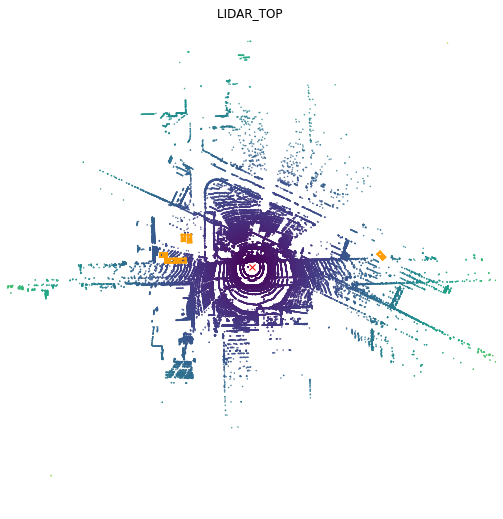

In [8]:
nusc.render_sample_data(first_sample['data']['LIDAR_TOP'], nsweeps=1, axes_limit=120, underlay_map=False)

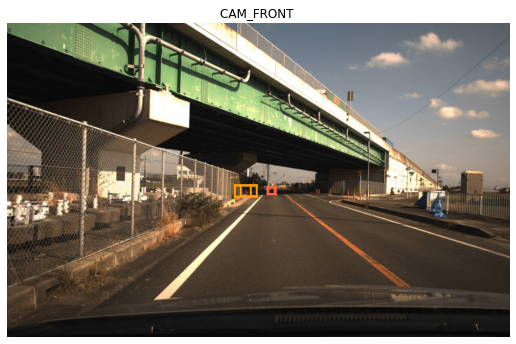

In [9]:
nusc.render_sample_data(first_sample['data']['CAM_FRONT'], nsweeps=1, axes_limit=120, underlay_map=False)

In [10]:
nusc.render_scene_channel(scene0['token'], 'CAM_FRONT')

Adding ego poses to map...


100%|██████████| 1/1 [00:00<00:00, 14.16it/s]

Creating plot...


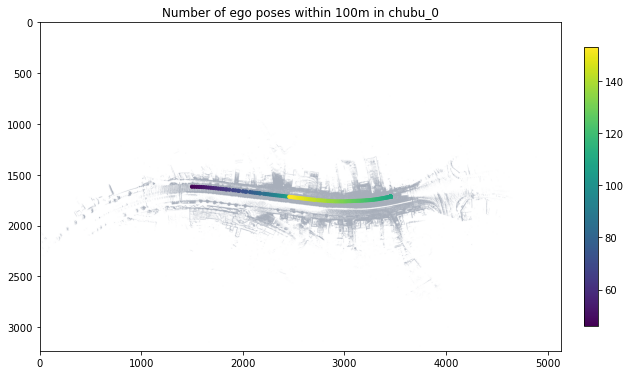

In [11]:
nusc.render_egoposes_on_map(log_location='chubu_0')